In [1]:
import findspark
findspark.init()
from pyspark import SparkContext
from pyspark.sql import SparkSession
spark = SparkSession.builder \
     .appName("Test SparkSession") \
     .getOrCreate()

In [5]:
scaler_00 = spark.read.csv("s3://chenxiyuanly502/project/scaler_00")

In [9]:
scaler_18 = spark.read.csv("s3://chenxiyuanly502/project/scaler_18")

In [8]:
scaler_00.show(5)

+-----------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|        _c0|  _c1|  _c2|  _c3|  _c4|  _c5|  _c6|  _c7|  _c8|  _c9| _c10| _c11|
+-----------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|      ! God|0.002|0.004|0.001|0.001|0.002|0.002|0.002|0.003|0.002|0.002|0.003|
|       ! in|0.001|0.002|0.001|0.001|0.002|0.002|0.002|0.003|0.002|0.002|0.002|
|         "!|0.006|0.007|0.005|0.005|0.005|0.005|0.005|0.005|0.003|0.004|0.004|
|   """ 128"|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|
|""" Before"|0.013|0.026|0.006|0.009|0.009|0.008|0.007|0.007|0.007|0.008|0.008|
+-----------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
only showing top 5 rows



In [10]:
scaler_18.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)



In [11]:
scaler_18.show(5)

+-----+-----+-----+-----+-----+----+-----+----+-----+-----+-----+-----+-----+-----+-----+
|  _c0|  _c1|  _c2|  _c3|  _c4| _c5|  _c6| _c7|  _c8|  _c9| _c10| _c11| _c12| _c13| _c14|
+-----+-----+-----+-----+-----+----+-----+----+-----+-----+-----+-----+-----+-----+-----+
|! God| 6627| 3697|  0.0|0.001|2980|0.001|3135|0.001|  0.0|0.001|0.001|  0.0|  0.0|  0.0|
|! God| 6627| 3697|  0.0|0.001|2980|0.001|3135|0.001|  0.0|0.001|0.001|  0.0|  0.0|  0.0|
| ! in| 8564| 6388|0.001|0.001|4487|0.001|5531|0.001|0.001|0.001|0.001|0.002|0.002|0.001|
| ! in| 8564| 6388|0.001|0.001|4487|0.001|5531|0.001|0.001|0.001|0.001|0.002|0.002|0.001|
|   "!|11952|12044|0.002|0.001|8408|0.002|9588|0.002|0.002|0.002|0.002|0.005|0.004|0.002|
+-----+-----+-----+-----+-----+----+-----+----+-----+-----+-----+-----+-----+-----+-----+
only showing top 5 rows



In [13]:
scaler_18 = scaler_18.drop('_c1')
scaler_18 = scaler_18.drop('_c2')
scaler_18 = scaler_18.drop('_c5')
scaler_18 = scaler_18.drop('_c7')
scaler_18.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)



In [14]:
newColumns =['ngram','y1990','y2000','y1970','y1980','y1940','y1950','y1960','y1900','y1910','y1920','y1930']
oldColumns = scaler_00.schema.names
for i in range(len(oldColumns)):
    scaler_00 = scaler_00.withColumnRenamed(oldColumns[i], newColumns[i])
scaler_00.printSchema()

root
 |-- ngram: string (nullable = true)
 |-- y1990: string (nullable = true)
 |-- y2000: string (nullable = true)
 |-- y1970: string (nullable = true)
 |-- y1980: string (nullable = true)
 |-- y1940: string (nullable = true)
 |-- y1950: string (nullable = true)
 |-- y1960: string (nullable = true)
 |-- y1900: string (nullable = true)
 |-- y1910: string (nullable = true)
 |-- y1920: string (nullable = true)
 |-- y1930: string (nullable = true)



In [15]:
for i in range(1,len(newColumns)):
    scaler_00 = scaler_00.withColumn(newColumns[i],  scaler_00[newColumns[i]].cast('double'))
scaler_00.show(5)    

+-----------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|      ngram|y1990|y2000|y1970|y1980|y1940|y1950|y1960|y1900|y1910|y1920|y1930|
+-----------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|      ! God|0.002|0.004|0.001|0.001|0.002|0.002|0.002|0.003|0.002|0.002|0.003|
|       ! in|0.001|0.002|0.001|0.001|0.002|0.002|0.002|0.003|0.002|0.002|0.002|
|         "!|0.006|0.007|0.005|0.005|0.005|0.005|0.005|0.005|0.003|0.004|0.004|
|   """ 128"|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|  0.0|
|""" Before"|0.013|0.026|0.006|0.009|0.009|0.008|0.007|0.007|0.007|0.008|0.008|
+-----------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
only showing top 5 rows



In [16]:
scaler_00.printSchema()

root
 |-- ngram: string (nullable = true)
 |-- y1990: double (nullable = true)
 |-- y2000: double (nullable = true)
 |-- y1970: double (nullable = true)
 |-- y1980: double (nullable = true)
 |-- y1940: double (nullable = true)
 |-- y1950: double (nullable = true)
 |-- y1960: double (nullable = true)
 |-- y1900: double (nullable = true)
 |-- y1910: double (nullable = true)
 |-- y1920: double (nullable = true)
 |-- y1930: double (nullable = true)



In [17]:
newColumns_18 =['ngram','y1880','y1890','y1860','y1870','y1830','y1840','y1850','y1800','y1810','y1820']
oldColumns_18 = scaler_18.schema.names
for i in range(len(oldColumns_18)):
    scaler_18 = scaler_18.withColumnRenamed(oldColumns_18[i], newColumns_18[i])
scaler_18.printSchema()

root
 |-- ngram: string (nullable = true)
 |-- y1880: string (nullable = true)
 |-- y1890: string (nullable = true)
 |-- y1860: string (nullable = true)
 |-- y1870: string (nullable = true)
 |-- y1830: string (nullable = true)
 |-- y1840: string (nullable = true)
 |-- y1850: string (nullable = true)
 |-- y1800: string (nullable = true)
 |-- y1810: string (nullable = true)
 |-- y1820: string (nullable = true)



In [18]:
for i in range(1,len(newColumns_18)):
    scaler_18 = scaler_18.withColumn(newColumns_18[i],  scaler_18[newColumns_18[i]].cast('double'))
scaler_18.show(5)  

+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|ngram|y1880|y1890|y1860|y1870|y1830|y1840|y1850|y1800|y1810|y1820|
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|! God|  0.0|0.001|0.001|0.001|  0.0|0.001|0.001|  0.0|  0.0|  0.0|
|! God|  0.0|0.001|0.001|0.001|  0.0|0.001|0.001|  0.0|  0.0|  0.0|
| ! in|0.001|0.001|0.001|0.001|0.001|0.001|0.001|0.002|0.002|0.001|
| ! in|0.001|0.001|0.001|0.001|0.001|0.001|0.001|0.002|0.002|0.001|
|   "!|0.002|0.001|0.002|0.002|0.002|0.002|0.002|0.005|0.004|0.002|
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
only showing top 5 rows



In [19]:
scaler_18.printSchema()

root
 |-- ngram: string (nullable = true)
 |-- y1880: double (nullable = true)
 |-- y1890: double (nullable = true)
 |-- y1860: double (nullable = true)
 |-- y1870: double (nullable = true)
 |-- y1830: double (nullable = true)
 |-- y1840: double (nullable = true)
 |-- y1850: double (nullable = true)
 |-- y1800: double (nullable = true)
 |-- y1810: double (nullable = true)
 |-- y1820: double (nullable = true)



In [20]:
df = scaler_00.join(scaler_18, ['ngram'])

In [21]:
df.printSchema()

root
 |-- ngram: string (nullable = true)
 |-- y1990: double (nullable = true)
 |-- y2000: double (nullable = true)
 |-- y1970: double (nullable = true)
 |-- y1980: double (nullable = true)
 |-- y1940: double (nullable = true)
 |-- y1950: double (nullable = true)
 |-- y1960: double (nullable = true)
 |-- y1900: double (nullable = true)
 |-- y1910: double (nullable = true)
 |-- y1920: double (nullable = true)
 |-- y1930: double (nullable = true)
 |-- y1880: double (nullable = true)
 |-- y1890: double (nullable = true)
 |-- y1860: double (nullable = true)
 |-- y1870: double (nullable = true)
 |-- y1830: double (nullable = true)
 |-- y1840: double (nullable = true)
 |-- y1850: double (nullable = true)
 |-- y1800: double (nullable = true)
 |-- y1810: double (nullable = true)
 |-- y1820: double (nullable = true)



In [22]:
df.show(5)

+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|ngram|y1990|y2000|y1970|y1980|y1940|y1950|y1960|y1900|y1910|y1920|y1930|y1880|y1890|y1860|y1870|y1830|y1840|y1850|y1800|y1810|y1820|
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|! God|0.002|0.004|0.001|0.001|0.002|0.002|0.002|0.003|0.002|0.002|0.003|  0.0|0.001|0.001|0.001|  0.0|0.001|0.001|  0.0|  0.0|  0.0|
|! God|0.002|0.004|0.001|0.001|0.002|0.002|0.002|0.003|0.002|0.002|0.003|  0.0|0.001|0.001|0.001|  0.0|0.001|0.001|  0.0|  0.0|  0.0|
| ! in|0.001|0.002|0.001|0.001|0.002|0.002|0.002|0.003|0.002|0.002|0.002|0.001|0.001|0.001|0.001|0.001|0.001|0.001|0.002|0.002|0.001|
| ! in|0.001|0.002|0.001|0.001|0.002|0.002|0.002|0.003|0.002|0.002|0.002|0.001|0.001|0.001|0.001|0.001|0.001|0.001|0.002|0.002|0.001|
|   "!|0.006|0.007|0.005|0.005|0.005|0.005|0.005|0.005|0.003|0

In [23]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [24]:
km_data = df.drop('ngram')

In [25]:
kmeans = KMeans(k=5, seed=1)

In [26]:
from pyspark.ml.feature import VectorAssembler
vecAssembler = VectorAssembler(inputCols=km_data.columns, outputCol="features")
new_df = vecAssembler.transform(km_data)

In [27]:
model = kmeans.fit(new_df)

In [28]:
predictions = model.transform(new_df)

In [29]:
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.9466562176321367


In [30]:
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[0.00250339 0.00380696 0.00218977 0.00231012 0.00247231 0.00242962
 0.00252964 0.00220418 0.00238062 0.00254338 0.00246289 0.0003022
 0.00033831 0.00041487 0.00039901 0.00038762 0.00038417 0.00039456
 0.00034993 0.00038182 0.00038678]
[0.46582474 0.70010309 0.39610309 0.41617526 0.44890722 0.44354639
 0.45690722 0.38095876 0.41369072 0.44958763 0.44529897 0.08925773
 0.09492784 0.09359794 0.0903299  0.08376289 0.0838866  0.08717526
 0.07619588 0.07862887 0.08053608]
[0.25742492 0.40483067 0.19686901 0.21602236 0.2225016  0.22015655
 0.22603834 0.18407029 0.19605112 0.21697764 0.21874441 0.04155591
 0.04566134 0.04347604 0.04200958 0.03707668 0.03779872 0.03961661
 0.03286901 0.03405431 0.03554313]
[0.11394969 0.1738985  0.08848102 0.09694616 0.09818182 0.09709444
 0.10002471 0.07973963 0.08669815 0.0949541  0.09579788 0.01799294
 0.01970609 0.01879435 0.01824095 0.01622154 0.01647485 0.0171827
 0.01450662 0.0150256  0.01561606]
[0.03443546 0.05104219 0.02726051 0.0296

In [31]:
for i in range(2, 11):
    kmeans = KMeans(k=i, seed=1)
    from pyspark.ml.feature import VectorAssembler
    vecAssembler = VectorAssembler(inputCols=km_data.columns, outputCol="features")
    new_df = vecAssembler.transform(km_data)
    model = kmeans.fit(new_df)
    predictions = model.transform(new_df)
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)
    print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.9929193229160893
Silhouette with squared euclidean distance = 0.9786287742883587
Silhouette with squared euclidean distance = 0.9634899413524292
Silhouette with squared euclidean distance = 0.9466562176321365
Silhouette with squared euclidean distance = 0.9350244165184387
Silhouette with squared euclidean distance = 0.8940362495232261
Silhouette with squared euclidean distance = 0.9085020625078081
Silhouette with squared euclidean distance = 0.8507366511576855
Silhouette with squared euclidean distance = 0.8908065955230743


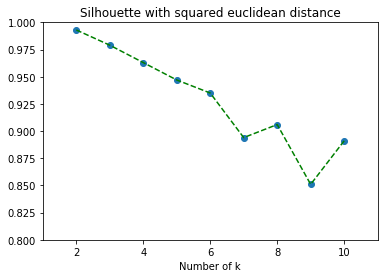

In [52]:
import matplotlib.pyplot as plt
x = [2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [.993, .979, .963, .947, .935, .894, .906, .851, .891]
plt.plot(x, y, 'g--')
plt.scatter(x, y)
plt.axis([1, 11, 0.8, 1])
plt.xlabel("Number of k")
plt.title("Silhouette with squared euclidean distance")
plt.show()